In [ ]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import torch.nn as nn

In [ ]:
#@title Crating a toy dataset
samples = 5000
train_split = int(samples*0.8)
X, y = make_blobs(samples, centers=2, n_features=64, cluster_std=10, random_state=2020)
y = y.reshape(-1, 1)

In [ ]:
X, y = torch.from_numpy(X).float(), torch.from_numpy(y).float()
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",X_test.shape)
print("Y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)
print("X.dtype",X.dtype)
print("y.dtype",y.dtype)

X_train.shape: torch.Size([4000, 64])
x_test.shape: torch.Size([1000, 64])
Y_train.shape: torch.Size([4000, 1])
y_test.shape: torch.Size([1000, 1])
X.dtype torch.float32
y.dtype torch.float32


In [ ]:
+class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(2020)
    self.fc1 = nn.Linear(64, 256)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(256, 1024)
    self.relu2 = nn.ReLU()
    self.out = nn.Linear(1024, 1)
    self.final = nn.Sigmoid()

  def forward(self, x):
    x = self.relu1(self.fc1(x))
    x = self.relu2(self.fc2(x))
    y = self.final(self.out(x))
    return y

In [ ]:
def train_network(model, optimizer, loss_function, num_epochs, batch_size, X_train, y_train):
  model.train()
  loss_across_epochs = []
  for epoch in range(num_epochs):
    train_loss = 0.0
    for i in range(0, X_train.shape[0], batch_size):
      input_data = X_train[i:min(X_train.shape[0],i+batch_size)]
      labels = y_train[i:min(X_train.shape[0],i+batch_size)]
      optimizer.zero_grad()
      output_data = model(input_data)
      loss = loss_function(output_data, labels)
      loss.backward()
      optimizer.step()
      train_loss += loss.item() * batch_size
    print("Epoch: {} - Loss:{:.4f}".format(epoch+1,train_loss ))
    loss_across_epochs.extend([train_loss])
  y_test_pred = model(X_test)
  a =np.where(y_test_pred>0.5,1,0)
  return(loss_across_epochs)

In [ ]:
model = NeuralNetwork()
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
num_epochs = 10
batch_size = 16

In [ ]:
adam_loss = train_network(model, optimizer, loss_function, num_epochs, batch_size, X_train, y_train)

Epoch: 1 - Loss:107.9976
Epoch: 2 - Loss:8.7378
Epoch: 3 - Loss:8.2710
Epoch: 4 - Loss:0.8969
Epoch: 5 - Loss:0.2221
Epoch: 6 - Loss:0.0017
Epoch: 7 - Loss:0.0016
Epoch: 8 - Loss:0.0014
Epoch: 9 - Loss:0.0012
Epoch: 10 - Loss:0.0011


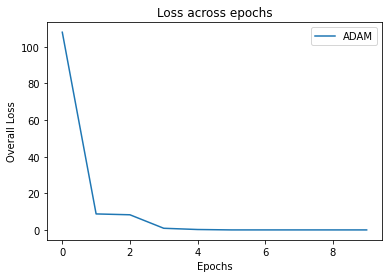

In [ ]:
ax = pyplot.subplot(111)
ax.plot(adam_loss,label="ADAM")
ax.legend()
plt.xlabel("Epochs")
plt.ylabel("Overall Loss")
plt.title("Loss across epochs")
plt.show()